In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem, PandasTools
import os

In [3]:
# Load the data
df = pd.read_csv('amidation_combinations_w_scaffolds.csv')
df

,ID_amine,ROMol_amine,ID_carboxyl,ROMol_carboxyl,product,amine,carboxyl
0,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-7444943,<rdkit.Chem.rdchem.Mol object at 0x16a245310>,Cc1cc(NC(=O)/C=C/c2ccc3occc3c2)n(C)n1,Cc1cc(N)n(C)n1,O=C(O)/C=C/c1ccc2occc2c1
1,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-16798,<rdkit.Chem.rdchem.Mol object at 0x16a245380>,COc1cc(/C=C/C(=O)Nc2cc(C)nn2C)ccc1O,Cc1cc(N)n(C)n1,COc1cc(/C=C/C(=O)O)ccc1O
2,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-1067793,<rdkit.Chem.rdchem.Mol object at 0x16a2453f0>,Cc1cc(NC(=O)/C=C/c2ccc(O)c(O)c2)n(C)n1,Cc1cc(N)n(C)n1,O=C(O)/C=C/c1ccc(O)c(O)c1
3,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-51296,<rdkit.Chem.rdchem.Mol object at 0x16a245460>,Cc1cc(NC(=O)CNC(=O)c2cc(C)oc2C)n(C)n1,Cc1cc(N)n(C)n1,Cc1cc(C(=O)NCC(=O)O)c(C)o1
4,EN300-14984,<rdkit.Chem.rdchem.Mol object at 0x16a244ac0>,EN300-331721,<rdkit.Chem.rdchem.Mol object at 0x16a2454d0>,Cc1cc(NC(=O)/C=C/c2ccc3c(c2)OCO3)n(C)n1,Cc1cc(N)n(C)n1,O=C(O)/C=C/c1ccc2c(c1)OCO2
...,...,...,...,...,...,...,...
87,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-270448,<rdkit.Chem.rdchem.Mol object at 0x16a246570>,Cc1cc(CNC(=O)/C=C/c2cc3ccccc3o2)n(C)n1,Cc1cc(CN)n(C)n1,O=C(O)/C=C/c1cc2ccccc2o1
88,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-50614,<rdkit.Chem.rdchem.Mol object at 0x16a246500>,Cc1cc(CNC(=O)CCC2=NC(=S)N=C2)n(C)n1,Cc1cc(CN)n(C)n1,O=C(O)CCC1=NC(=S)N=C1
89,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-35411,<rdkit.Chem.rdchem.Mol object at 0x16a246650>,Cc1cc(CNC(=O)c2ccc3c(c2)=NC(=O)N=3)n(C)n1,Cc1cc(CN)n(C)n1,O=C1N=c2ccc(C(=O)O)cc2=N1
90,EN300-204033,<rdkit.Chem.rdchem.Mol object at 0x16a244f90>,EN300-52322,<rdkit.Chem.rdchem.Mol object at 0x16a2466c0>,Cc1cc(CNC(=O)CNC(=O)c2ccsc2)n(C)n1,Cc1cc(CN)n(C)n1,O=C(O)CNC(=O)c1ccsc1


In [4]:
def get_reactants(mol_amine, mol_carboxyl):
    amine = Chem.MolToSmiles(mol_amine)
    carboxyl = Chem.MolToSmiles(mol_carboxyl)
    print(amine)
    print(carboxyl)
    return [(carboxyl, amine)]

In [5]:
# make new df
# smiles,reactants,reaction_names,num_steps,hits,compound_set
new_rows = []
for _, row in df.iterrows():
    new_row = {'smiles': row['product'],
               'reactants': [(row['carboxyl'], row['amine'])],
               'reaction_names': 'Amidation',
               'num_steps': 1,
               'hits': 'A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A71EV2A-x1346_A_250_1_A71EV2A-x0526+A+147+1',
               'compound_set': 'matteo_reactants_aug_2024'}
    new_rows.append(new_row)

assert len(new_rows) == len(df)

In [6]:
df = pd.DataFrame(new_rows)
df

,smiles,reactants,reaction_names,num_steps,hits,compound_set
0,Cc1cc(NC(=O)/C=C/c2ccc3occc3c2)n(C)n1,"[(O=C(O)/C=C/c1ccc2occc2c1, Cc1cc(N)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
1,COc1cc(/C=C/C(=O)Nc2cc(C)nn2C)ccc1O,"[(COc1cc(/C=C/C(=O)O)ccc1O, Cc1cc(N)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
2,Cc1cc(NC(=O)/C=C/c2ccc(O)c(O)c2)n(C)n1,"[(O=C(O)/C=C/c1ccc(O)c(O)c1, Cc1cc(N)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
3,Cc1cc(NC(=O)CNC(=O)c2cc(C)oc2C)n(C)n1,"[(Cc1cc(C(=O)NCC(=O)O)c(C)o1, Cc1cc(N)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
4,Cc1cc(NC(=O)/C=C/c2ccc3c(c2)OCO3)n(C)n1,"[(O=C(O)/C=C/c1ccc2c(c1)OCO2, Cc1cc(N)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
...,...,...,...,...,...,...
87,Cc1cc(CNC(=O)/C=C/c2cc3ccccc3o2)n(C)n1,"[(O=C(O)/C=C/c1cc2ccccc2o1, Cc1cc(CN)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
88,Cc1cc(CNC(=O)CCC2=NC(=S)N=C2)n(C)n1,"[(O=C(O)CCC1=NC(=S)N=C1, Cc1cc(CN)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
89,Cc1cc(CNC(=O)c2ccc3c(c2)=NC(=O)N=3)n(C)n1,"[(O=C1N=c2ccc(C(=O)O)cc2=N1, Cc1cc(CN)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
90,Cc1cc(CNC(=O)CNC(=O)c2ccsc2)n(C)n1,"[(O=C(O)CNC(=O)c1ccsc1, Cc1cc(CN)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024


In [7]:
# drop duplicate rows
df = df.drop_duplicates(subset='smiles')
df

,smiles,reactants,reaction_names,num_steps,hits,compound_set
0,Cc1cc(NC(=O)/C=C/c2ccc3occc3c2)n(C)n1,"[(O=C(O)/C=C/c1ccc2occc2c1, Cc1cc(N)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
1,COc1cc(/C=C/C(=O)Nc2cc(C)nn2C)ccc1O,"[(COc1cc(/C=C/C(=O)O)ccc1O, Cc1cc(N)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
2,Cc1cc(NC(=O)/C=C/c2ccc(O)c(O)c2)n(C)n1,"[(O=C(O)/C=C/c1ccc(O)c(O)c1, Cc1cc(N)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
3,Cc1cc(NC(=O)CNC(=O)c2cc(C)oc2C)n(C)n1,"[(Cc1cc(C(=O)NCC(=O)O)c(C)o1, Cc1cc(N)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
4,Cc1cc(NC(=O)/C=C/c2ccc3c(c2)OCO3)n(C)n1,"[(O=C(O)/C=C/c1ccc2c(c1)OCO2, Cc1cc(N)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
...,...,...,...,...,...,...
87,Cc1cc(CNC(=O)/C=C/c2cc3ccccc3o2)n(C)n1,"[(O=C(O)/C=C/c1cc2ccccc2o1, Cc1cc(CN)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
88,Cc1cc(CNC(=O)CCC2=NC(=S)N=C2)n(C)n1,"[(O=C(O)CCC1=NC(=S)N=C1, Cc1cc(CN)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
89,Cc1cc(CNC(=O)c2ccc3c(c2)=NC(=O)N=3)n(C)n1,"[(O=C1N=c2ccc(C(=O)O)cc2=N1, Cc1cc(CN)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024
90,Cc1cc(CNC(=O)CNC(=O)c2ccsc2)n(C)n1,"[(O=C(O)CNC(=O)c1ccsc1, Cc1cc(CN)n(C)n1)]",Amidation,1,A71EV2A-x0487_A_250_1_A71EV2A-x0526+A+147+1 A7...,matteo_reactants_aug_2024


/opt/homebrew/anaconda3/envs/syndirella/lib/python3.12/site-packages/rdkit/Chem/PandasTools.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)
/opt/homebrew/anaconda3/envs/syndirella/lib/python3.12/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


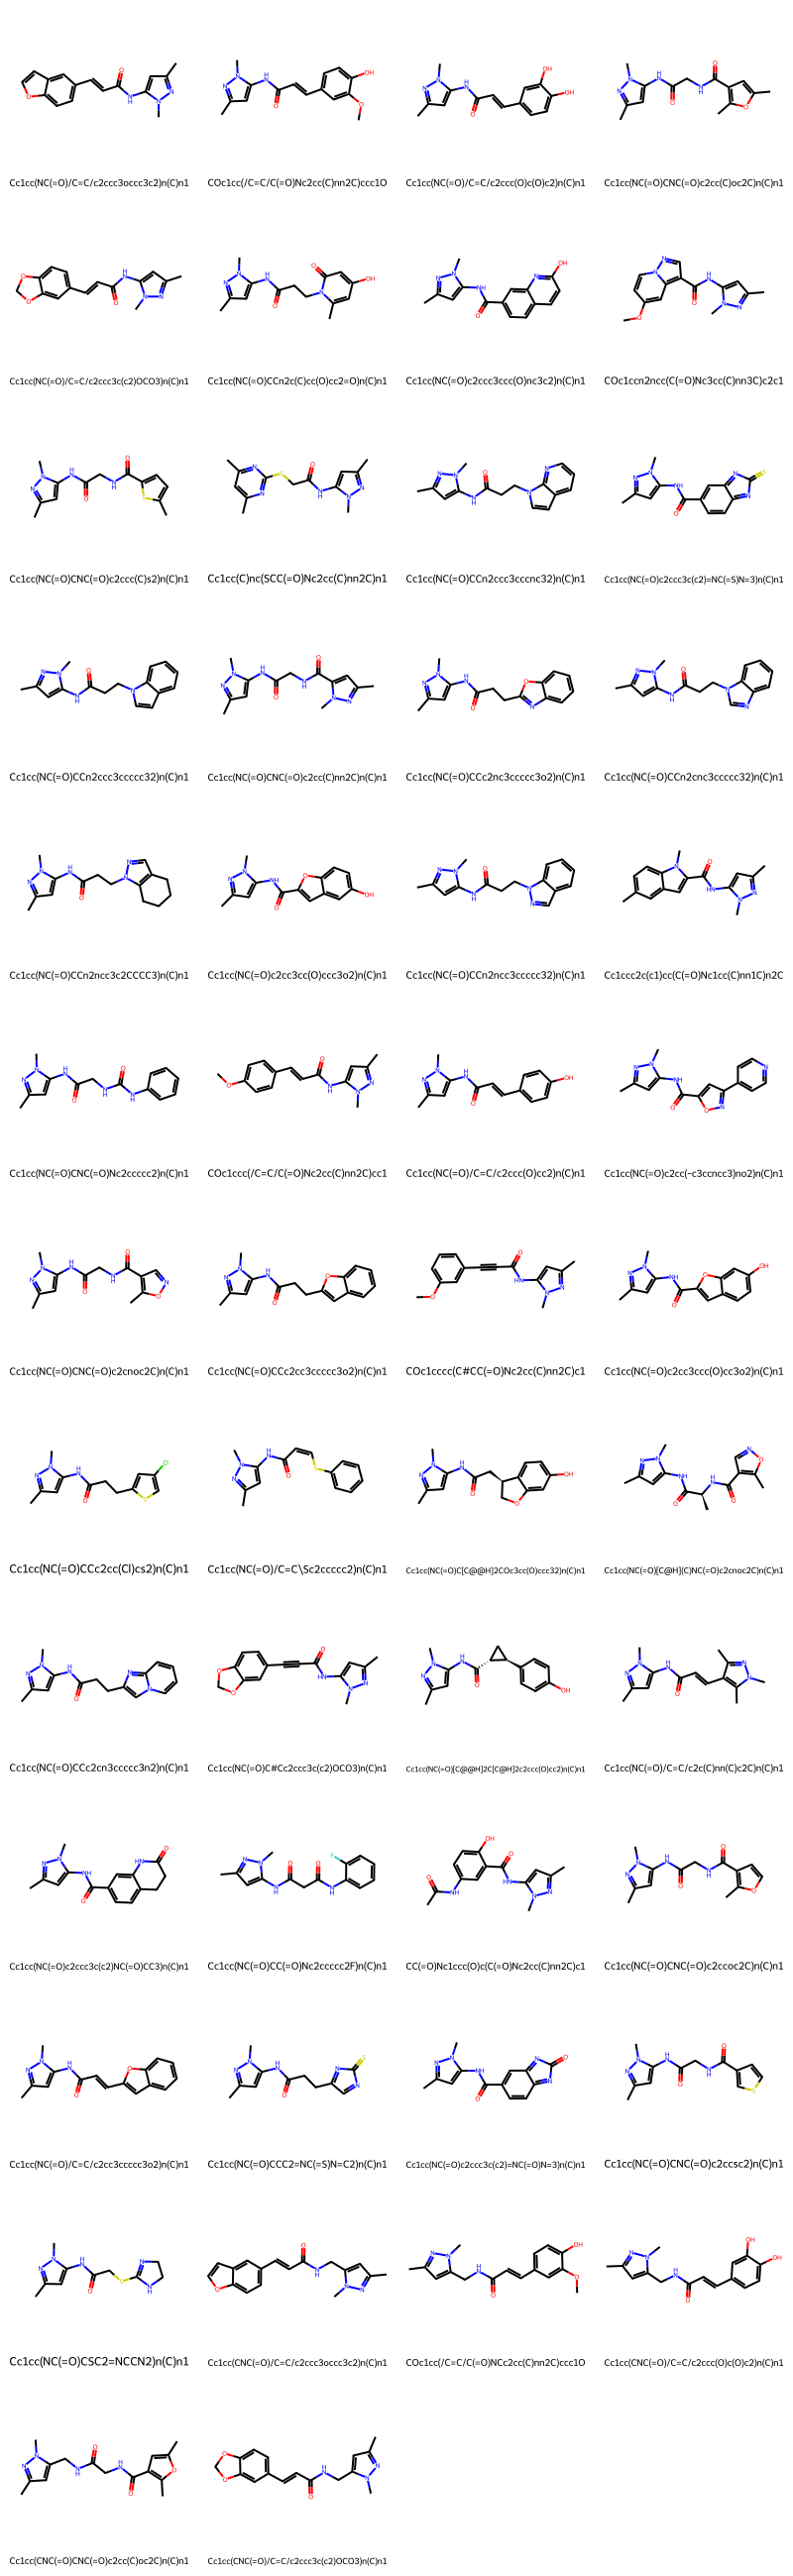

In [8]:
# make mol column with PandasTools
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='smiles')
PandasTools.FrameToGridImage(df, legendsCol='smiles', molsPerRow=4, subImgSize=(200, 200))

In [9]:
# avg num heavy atoms
df['ROMol'].apply(lambda x: x.GetNumHeavyAtoms()).mean()

20.855555555555554

In [10]:
# save to sydirella syndirella_input file .csv
df = df.drop(columns=['ROMol'])
df.to_csv('../designs/syndirella_input_amidation_90_scaffolds.csv', index=False)

## x1346 hit analogues

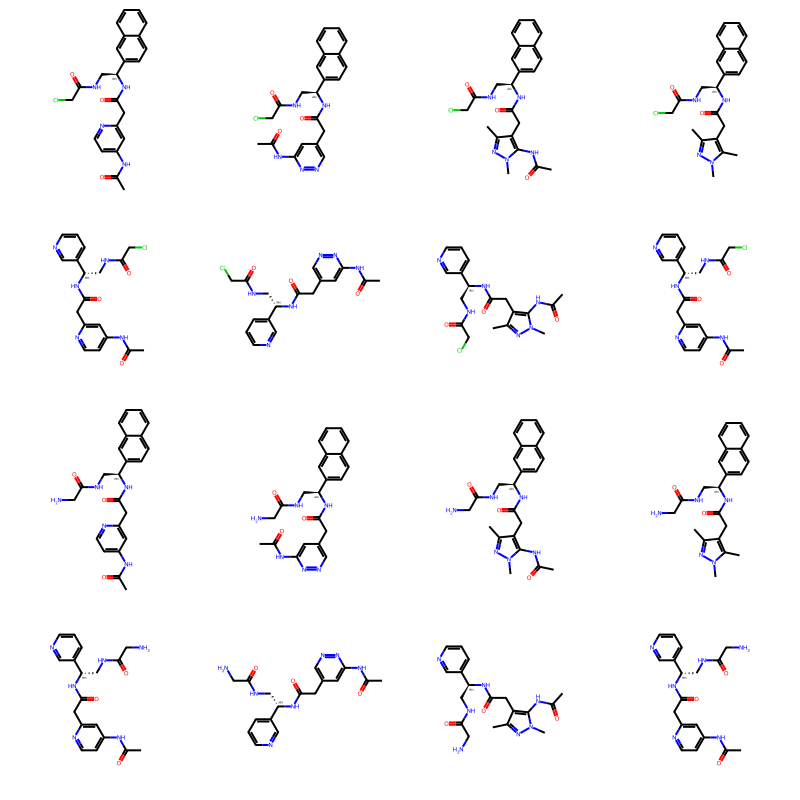

In [11]:
df = PandasTools.LoadSDF('../designs/x1346_analogues_16.sdf')
PandasTools.FrameToGridImage(df, molsPerRow=4, subImgSize=(200, 200))

,original_query,smiles,ID,ROMol
0,CC(=O)Nc1ccnc(CC(=O)N[C@@H](CNC(=O)CCl)c2ccc3c...,CC(=O)Nc1ccnc(CC(=O)N[C@@H](CNC(=O)CCl)c2ccc3c...,,
1,CC(=O)Nc1cc(CC(=O)N[C@@H](CNC(=O)CCl)c2ccc3ccc...,CC(=O)Nc1cc(CC(=O)N[C@@H](CNC(=O)CCl)c2ccc3ccc...,,
2,CC(=O)Nc1c(CC(=O)N[C@@H](CNC(=O)CCl)c2ccc3cccc...,CC(=O)Nc1c(CC(=O)N[C@@H](CNC(=O)CCl)c2ccc3cccc...,,
3,Cc1nn(C)c(C)c1CC(=O)N[C@@H](CNC(=O)CCl)c1ccc2c...,Cc1nn(C)c(C)c1CC(=O)N[C@@H](CNC(=O)CCl)c1ccc2c...,,
4,CC(=O)Nc1ccnc(CC(=O)N[C@@H](CNC(=O)CCl)c2cccnc...,CC(=O)Nc1ccnc(CC(=O)N[C@@H](CNC(=O)CCl)c2cccnc...,,
5,CC(=O)Nc1cc(CC(=O)N[C@@H](CNC(=O)CCl)c2cccnc2)...,CC(=O)Nc1cc(CC(=O)N[C@@H](CNC(=O)CCl)c2cccnc2)...,,
6,CC(=O)Nc1c(CC(=O)N[C@@H](CNC(=O)CCl)c2cccnc2)c...,CC(=O)Nc1c(CC(=O)N[C@@H](CNC(=O)CCl)c2cccnc2)c...,,
7,CC(=O)Nc1ccnc(CC(=O)N[C@@H](CNC(=O)CCl)c2cccnc...,CC(=O)Nc1ccnc(CC(=O)N[C@@H](CNC(=O)CCl)c2cccnc...,,
8,CC(=O)Nc1ccnc(CC(=O)N[C@@H](CNC(=O)CN)c2ccc3cc...,CC(=O)Nc1ccnc(CC(=O)N[C@@H](CNC(=O)CN)c2ccc3cc...,,
9,CC(=O)Nc1cc(CC(=O)N[C@@H](CNC(=O)CN)c2ccc3cccc...,CC(=O)Nc1cc(CC(=O)N[C@@H](CNC(=O)CN)c2ccc3cccc...,,

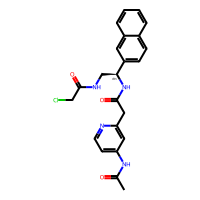
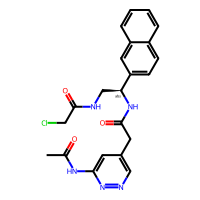
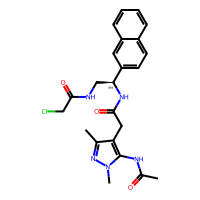
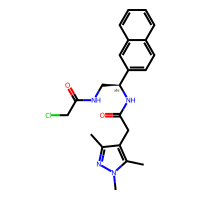
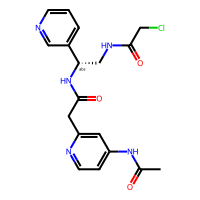
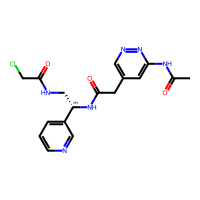
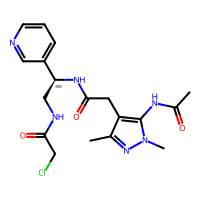
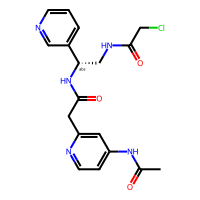
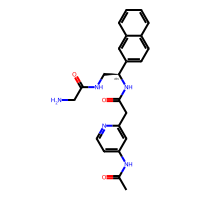
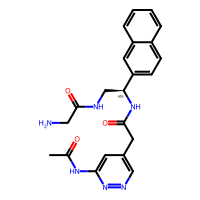
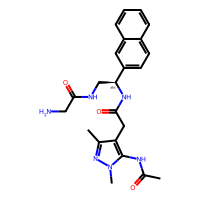
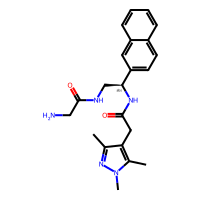
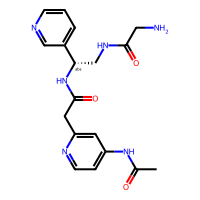
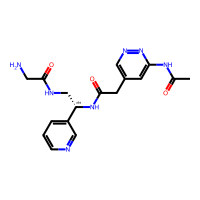
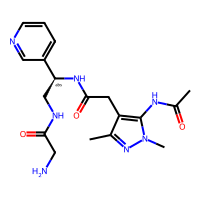
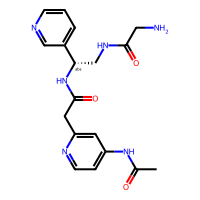

In [12]:
df

In [13]:
# open hippo to make sure it looks good
df = pd.read_pickle('../VINVRWFILPAKSR-ZETCQYMHSA-N_TyPLbw_to_hippo.pkl.gz')
df

,base_compound_smiles,1_reaction,1_r1_smiles,1_r2_smiles,1_r_previous_product,1_product_smiles,1_product_name,1_num_atom_diff,1_flag,1_stereoisomer,error,∆∆G,∆G_bound,∆G_unbound,comRMSD,regarded,path_to_mol,intra_geometry_pass
0,COCC(=O)N1CCC[C@H](C(N)=O)C1,Amidation,COCC(=O)O,NC(=O)C1CCCNC1,None,COCC(=O)N1CCC[C@H](C(N)=O)C1,VINVRWFILPAKSR-ZETCQYMHSA-N-TyPLbw-base-A,0,None,A,,-32.638634,143.833173,176.471807,0.267752,[A71EV2A-x0926_A_250_1_A71EV2A-x0526+A+147+1],/opt/xchem-fragalysis-2/kfieseler/A71EV2A_run5...,True
1,COCC(=O)N1CCC[C@H](C(N)=O)C1,Amidation,COCC(=O)O,NC(=O)C1CCCNC1,None,COCC(=O)N1CCC[C@@H](C(N)=O)C1,VINVRWFILPAKSR-ZETCQYMHSA-N-TyPLbw-base-B,0,None,B,,-24.187421,221.164284,245.351705,0.430856,[A71EV2A-x0926_A_250_1_A71EV2A-x0526+A+147+1],/opt/xchem-fragalysis-2/kfieseler/A71EV2A_run5...,True
2,COCC(=O)N1CCC[C@H](C(N)=O)C1,Amidation,COCC(=O)O,O=C1NC2CNCC1C2,None,COCC(=O)N1C[C@@H]2C[C@H](C1)C(=O)N2,VINVRWFILPAKSR-ZETCQYMHSA-N-TyPLbw-300-A,0,None,A,,-18.937421,278.234411,297.171832,1.023402,[A71EV2A-x0926_A_250_1_A71EV2A-x0526+A+147+1],/opt/xchem-fragalysis-2/kfieseler/A71EV2A_run5...,True
3,COCC(=O)N1CCC[C@H](C(N)=O)C1,Amidation,COCC(=O)O,O=C1NC2CNCC1C2,None,COCC(=O)N1C[C@H]2C[C@H](C1)C(=O)N2,VINVRWFILPAKSR-ZETCQYMHSA-N-TyPLbw-300-B,0,None,B,ValueError: Bad Conformer Id,NaN,NaN,NaN,NaN,[A71EV2A-x0926_A_250_1_A71EV2A-x0526+A+147+1],None,True
4,COCC(=O)N1CCC[C@H](C(N)=O)C1,Amidation,COCC(=O)O,O=C1NC2CNCC1C2,None,COCC(=O)N1C[C@@H]2C[C@@H](C1)C(=O)N2,VINVRWFILPAKSR-ZETCQYMHSA-N-TyPLbw-300-C,0,None,C,ValueError: Bad Conformer Id,NaN,NaN,NaN,NaN,[A71EV2A-x0926_A_250_1_A71EV2A-x0526+A+147+1],None,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,COCC(=O)N1CCC[C@H](C(N)=O)C1,Amidation,O=C(O)COCCCF,CC1(C)CCC(C(N)=O)CN1,None,CC1(C)CC[C@@H](C(N)=O)CN1C(=O)COCCCF,VINVRWFILPAKSR-ZETCQYMHSA-N-TyPLbw-2491-B,5,None,B,,-51.668306,296.195636,347.863942,0.567343,[A71EV2A-x0926_A_250_1_A71EV2A-x0526+A+147+1],/opt/xchem-fragalysis-2/kfieseler/A71EV2A_run5...,True
9996,COCC(=O)N1CCC[C@H](C(N)=O)C1,Amidation,O=C(O)COCCCF,CNC(=O)C1(C)CCCNC1,None,CNC(=O)[C@]1(C)CCCN(C(=O)COCCCF)C1,VINVRWFILPAKSR-ZETCQYMHSA-N-TyPLbw-2492-A,5,None,A,,-13.237688,347.524818,360.762506,0.802153,[A71EV2A-x0926_A_250_1_A71EV2A-x0526+A+147+1],/opt/xchem-fragalysis-2/kfieseler/A71EV2A_run5...,True
9997,COCC(=O)N1CCC[C@H](C(N)=O)C1,Amidation,O=C(O)COCCCF,CNC(=O)C1(C)CCCNC1,None,CNC(=O)[C@@]1(C)CCCN(C(=O)COCCCF)C1,VINVRWFILPAKSR-ZETCQYMHSA-N-TyPLbw-2492-B,5,None,B,,-10.726394,370.767059,381.493453,0.879239,[A71EV2A-x0926_A_250_1_A71EV2A-x0526+A+147+1],/opt/xchem-fragalysis-2/kfieseler/A71EV2A_run5...,True
9998,COCC(=O)N1CCC[C@H](C(N)=O)C1,Amidation,O=C(O)C1OCCO1,CCCNC(=O)C1CCCNC1,None,CCCNC(=O)[C@@H]1CCCN(C(=O)C2OCCO2)C1,VINVRWFILPAKSR-ZETCQYMHSA-N-TyPLbw-2493-A,5,None,A,,2.949221,286.088882,283.139661,1.522198,[A71EV2A-x0926_A_250_1_A71EV2A-x0526+A+147+1],/opt/xchem-fragalysis-2/kfieseler/A71EV2A_run5...,True
